In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
read_train_file = pd.read_excel ('E:\\python\\Restaurant Food Cost\\Data_Train.xlsx')
read_train_file.to_csv ('E:\\python\\Restaurant Food Cost\\Data_Train_Train.csv', index = None, header=True)

#Here we converted xlsx file into csv format. 

In [3]:
read_train_file

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
read_train_file.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [5]:
read_train_file.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
#WE can see RESTAURANT_ID column has unique id for each restaurant and hence we will drop this column as it will not be of any
#use in model building process 
read_train_file.drop('RESTAURANT_ID',axis=1,inplace=True)

In [7]:
read_train_file.isnull().sum()

TITLE          0
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

In [8]:
read_train_file["VOTES"]

0          49 votes
1          30 votes
2         221 votes
3          24 votes
4         165 votes
            ...    
12685     546 votes
12686    1214 votes
12687     608 votes
12688      32 votes
12689     677 votes
Name: VOTES, Length: 12690, dtype: object

In [9]:
read_train_file["VOTES"] = read_train_file["VOTES"].str.split()
read_train_file['VOTES'] = read_train_file['VOTES'].str[0].astype("float")

In [10]:
read_train_file['VOTES'] = read_train_file['VOTES'].fillna(read_train_file['VOTES'].mean())

In [11]:
read_train_file["VOTES"] = read_train_file["VOTES"].astype(int)

In [12]:
read_train_file["VOTES"]

0          49
1          30
2         221
3          24
4         165
         ... 
12685     546
12686    1214
12687     608
12688      32
12689     677
Name: VOTES, Length: 12690, dtype: int32

In [13]:
#We can see that columns City and locality has null values.since these 2 columns are object datatype, we will replace
#null vallues with most used value.
#Column RATING has 2 null values, we will replace null values with mean value  

In [14]:
#read_train_file['RATING'] = read_train_file['RATING'].fillna(read_train_file['RATING'].mean())
read_train_file['CITY'] = read_train_file['CITY'].fillna(read_train_file['CITY'].mode()[0])
read_train_file['LOCALITY'] = read_train_file['LOCALITY'].fillna(read_train_file['LOCALITY'].mode()[0])

In [15]:
read_train_file['RATING'] = pd.to_numeric(read_train_file.RATING.astype(str).str.replace(',',''), errors='coerce').fillna(0)     

In [16]:
read_train_file.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [17]:
read_train_file.head(5)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [18]:
#Now we will work on Title column
read_train_file["TITLE"]=read_train_file["TITLE"].str.split(",")
title ={}
for x in read_train_file["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in title:
            title[each]+=1
        else:
            title[each]=1
            #continue

#Here we have seperated various titles from all rows and then grouped them to take a count of number of instances
#for each title.

In [19]:
qual = sorted(title.items(),key=lambda x:x[1],reverse=True)[:10]
final_title =[]


for tup in qual:
    final_title.append(tup[0])
print(final_title)

#Here we have created list of title of restaurant wherein top 10 title which has most number of count 
#are selected. 

['QUICK BITES', 'CASUAL DINING', 'None', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE']


In [20]:
#Here we found that one of title has value 'None' and hence we have removed it from our list
for i in final_title:
    if i =='None':
        final_title.remove(i)
print(final_title)

['QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE']


In [21]:
for i in final_title:
    read_train_file[i]=0
    
for x,y in zip(read_train_file["TITLE"].values,np.array([idx for idx in range(len(read_train_file))])):
    for q in x:
        q = q.strip()
        if q in final_title:
            read_train_file[q][y] = 1
            
read_train_file.drop("TITLE",axis=1,inplace=True)

In [22]:
read_train_file.head(5)

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,LOUNGE
0,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,0,1,0,0,0,0,0,0,0
1,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,1,0,1,0,0,0,0,0
2,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,0,1,0,0,0,0,0,0,0
3,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,1,0,0,0,0,0,0,0,0
4,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,1,0,0,0,0


In [23]:
#Now we will work on CUISINES column
read_train_file["CUISINES"]=read_train_file["CUISINES"].str.split(",")
cus ={}
for x in read_train_file["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in cus:
            cus[each]+=1
        else:
            cus[each]=1
            #continue
#Here we have seperated various CUISINES from all rows and then grouped them to take a count of number of instances
#for each CUISINE.

In [24]:
qual = sorted(cus.items(),key=lambda x:x[1],reverse=True)[:10]
final_cus =[]

for tup in qual:
    final_cus.append(tup[0])
print(final_cus)

['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Desserts', 'Italian', 'Beverages', 'Cafe']


In [25]:
for i in final_cus:
    read_train_file[i]=0
    
for x,y in zip(read_train_file["CUISINES"].values,np.array([idx for idx in range(len(read_train_file))])):
    for q in x:
        q = q.strip()
        if q in final_cus:
            read_train_file[q][y] = 1
            
read_train_file.drop("CUISINES",axis=1,inplace=True)

In [26]:
read_train_file.head(5)

,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
read_train_file.dtypes

TIME               object
CITY               object
LOCALITY           object
RATING            float64
VOTES               int32
COST                int64
QUICK BITES         int64
CASUAL DINING       int64
CAFÉ                int64
BAR                 int64
DESSERT PARLOR      int64
BAKERY              int64
FINE DINING         int64
BEVERAGE SHOP       int64
LOUNGE              int64
North Indian        int64
Chinese             int64
South Indian        int64
Fast Food           int64
Continental         int64
Biryani             int64
Desserts            int64
Italian             int64
Beverages           int64
Cafe                int64
dtype: object

<AxesSubplot:>

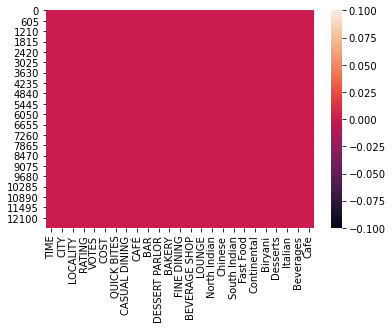

In [28]:
sns.heatmap(read_train_file.isnull()) # heatmap also indicates that there are no null values in dataset.

In [29]:
#WE can see that columns Time, Locality and city are of object datatypes and hence we will encode them into numerical

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
read_train_file['CITY']=le.fit_transform(read_train_file['CITY'])
read_train_file['TIME']=le.fit_transform(read_train_file['TIME'])
read_train_file['LOCALITY']=le.fit_transform(read_train_file['LOCALITY'])
read_train_file

,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
0,739,320,285,3.6,49,1200,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1885,67,1046,4.2,30,1500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,661,67,1101,3.8,221,800,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,275,222,136,4.1,24,800,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,615,222,620,3.8,165,300,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,1144,131,342,3.8,546,500,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12686,1177,222,133,4.3,1214,1800,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
12687,1137,239,1342,4.0,608,1300,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12688,1837,67,631,3.5,32,400,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0


In [31]:
read_train_file.describe()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,...,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,1180.084003,142.281403,652.391568,3.426296,415.605437,655.252246,0.362333,0.345075,0.066430,0.053743,...,0.424192,0.344208,0.179196,0.167139,0.123168,0.099291,0.090307,0.090229,0.076202,0.065406
std,754.459944,83.921428,399.116379,1.179799,801.745654,627.003540,0.480693,0.475411,0.249043,0.225519,...,0.494239,0.475128,0.383532,0.373115,0.328643,0.299064,0.286633,0.286520,0.265331,0.247250
min,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,555.000000,67.000000,337.000000,3.400000,64.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1123.000000,131.000000,582.000000,3.800000,200.000000,500.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1847.000000,222.000000,1009.000000,4.000000,415.000000,800.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2688.000000,358.000000,1415.000000,4.900000,41186.000000,14000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


TIME                 AxesSubplot(0.125,0.749828;0.133621x0.130172)
CITY              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
LOCALITY           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
RATING            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
VOTES             AxesSubplot(0.766379,0.749828;0.133621x0.130172)
COST                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
QUICK BITES       AxesSubplot(0.285345,0.593621;0.133621x0.130172)
CASUAL DINING      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
CAFÉ              AxesSubplot(0.606034,0.593621;0.133621x0.130172)
BAR               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
DESSERT PARLOR       AxesSubplot(0.125,0.437414;0.133621x0.130172)
BAKERY            AxesSubplot(0.285345,0.437414;0.133621x0.130172)
FINE DINING        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
BEVERAGE SHOP     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
LOUNGE            AxesSubplot(0.766379,0.437414;0.133621x0.130

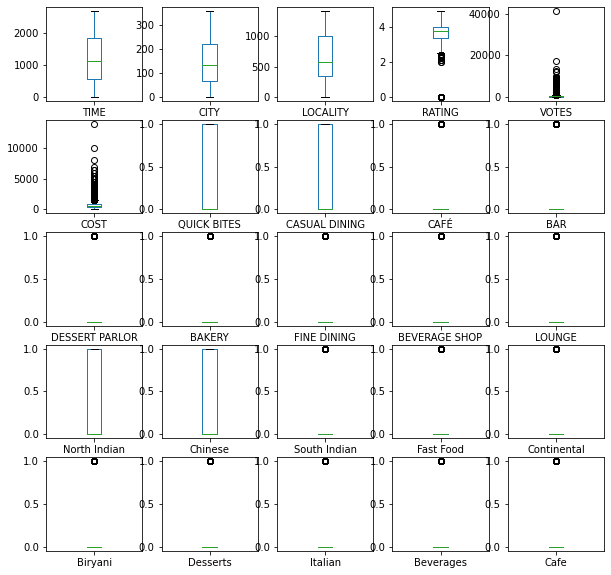

In [32]:
read_train_file.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,10))

<AxesSubplot:>

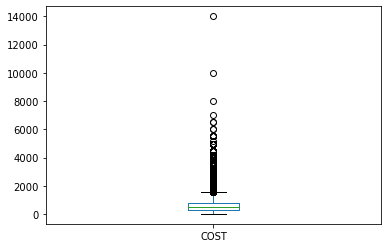

In [33]:
read_train_file['COST'].plot(kind='box')

<AxesSubplot:>

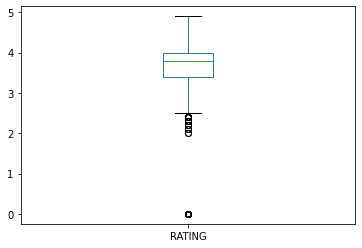

In [34]:
read_train_file['RATING'].plot(kind='box')

<AxesSubplot:>

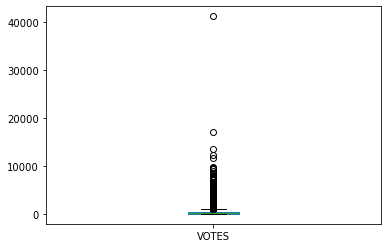

In [35]:
read_train_file['VOTES'].plot(kind='box')

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(read_train_file))
z
data_new = read_train_file[(z<3).all(axis = 1)]

In [37]:
data_new.shape

(7027, 25)

In [38]:
read_train_file.shape

(12690, 25)

In [39]:
#By removing outliers there is a data loss of more than 44% hence we will go ahead with outliers

In [40]:
read_train_file.skew()

TIME               0.306186
CITY               0.266332
LOCALITY           0.352317
RATING            -2.214271
VOTES             14.890730
COST               3.978801
QUICK BITES        0.572878
CASUAL DINING      0.651855
CAFÉ               3.482442
BAR                3.958224
DESSERT PARLOR     4.201886
BAKERY             4.571879
FINE DINING        5.699442
BEVERAGE SHOP      6.927858
LOUNGE             7.756587
North Indian       0.306814
Chinese            0.655893
South Indian       1.673157
Fast Food          1.784506
Continental        2.293625
Biryani            2.680180
Desserts           2.859109
Italian            2.860783
Beverages          3.194990
Cafe               3.515972
dtype: float64

In [41]:
data_new.skew()

TIME              0.206651
CITY              0.245159
LOCALITY          0.323509
RATING           -2.055153
VOTES             2.739638
COST              1.942501
QUICK BITES       0.105763
CASUAL DINING     0.494719
CAFÉ              0.000000
BAR               0.000000
DESSERT PARLOR    0.000000
BAKERY            0.000000
FINE DINING       0.000000
BEVERAGE SHOP     0.000000
LOUNGE            0.000000
North Indian      0.029894
Chinese           0.349980
South Indian      1.143376
Fast Food         1.705505
Continental       3.427581
Biryani           0.000000
Desserts          0.000000
Italian           0.000000
Beverages         0.000000
Cafe              0.000000
dtype: float64

In [42]:
#We can see that there is a large skewness in data which indicates that data is very much scattered.

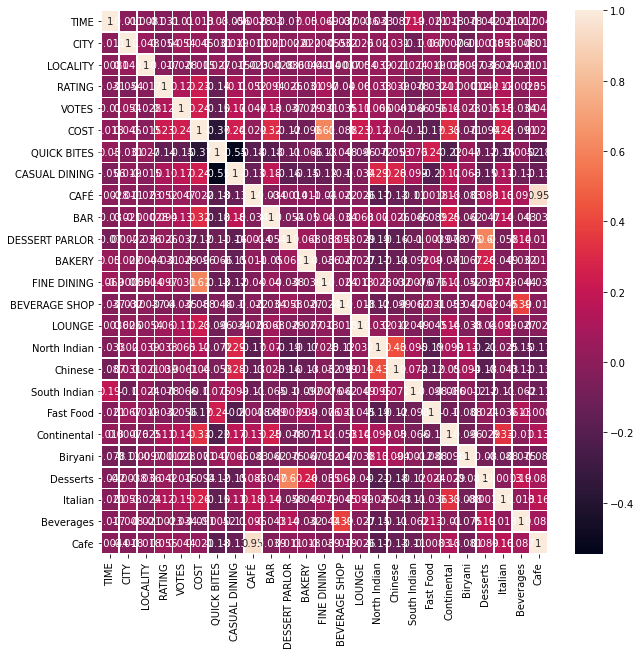

In [43]:
corr= read_train_file.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [44]:
# We can see column casual dining and quick bites are having negative correlation with each other

In [45]:
read_train_file.columns

Index(['TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'QUICK BITES',
       'CASUAL DINING', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY',
       'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE', 'North Indian', 'Chinese',
       'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Desserts',
       'Italian', 'Beverages', 'Cafe'],
      dtype='object')

In [46]:
y = read_train_file.iloc[:,5]

In [47]:
y.shape

(12690,)

In [48]:
x = read_train_file.drop('COST',axis=1)

In [49]:
x.shape

(12690, 24)

In [50]:
from sklearn.preprocessing import power_transform
raw_data = power_transform(read_train_file, method = 'yeo-johnson')

#To remove skewness from data we are using 'yeo-johnson' method

In [51]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [52]:
models = [KNeighborsRegressor(),LinearRegression(),RandomForestRegressor(),Lasso(),Ridge(),SVR()]
#models = [LinearRegression()]
max_score = 0
for i in range(1,10):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        #print("Entered for:", j)
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=r2_score(pred,test_y)
        #print("for model:", j, "score is:",temp_score )
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.6936624206958036 of model: RandomForestRegressor() with best random state value is: 2


In [53]:
rfr=RandomForestRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
rfr.fit(train_x,train_y)
predrfr = rfr.predict(test_x).astype(int)
print("Random state used is:",final_temp_state)
print("R2 score:",r2_score(predrfr,test_y))
print("Absolute squarred error:", mean_absolute_error(test_y,predrfr))
print("Mean squarred error:", mean_squared_error(test_y,predrfr))

Random state used is: 2
R2 score: 0.6968885047080835
Absolute squarred error: 197.29984239558706
Mean squarred error: 110902.51024428684


Text(0, 0.5, 'Predicted values')

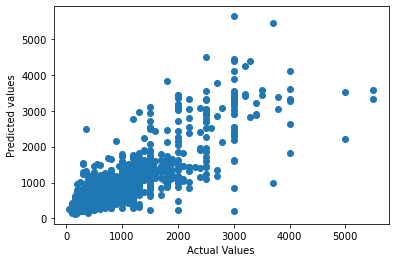

In [54]:
plt.scatter(x=test_y,y=predrfr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [55]:
#WE can see that average cost of restaurant is highly concentrated between 500 to 1500 

In [56]:
import pickle
filename = 'E:\\python\\Restaurant Food Cost\\restaurant_food_cost.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [57]:
#output_data_rfr=pd.DataFrame(predrfr)
#output_data_rfr.to_csv("E:\\python\\Restaurant Food Cost\\restaurant_food_cost.csv",header=0)

# Test data logic starts here 

In [58]:
read_test_file = pd.read_excel ('E:\\python\\Restaurant Food Cost\\Data_Test.xlsx')
read_test_file.to_csv ('E:\\python\\Restaurant Food Cost\\Data_Test.csv', index = None, header=True)

In [59]:
read_test_file

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [60]:
read_test_file.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [61]:
read_test_file.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [62]:
read_test_file.drop('RESTAURANT_ID',axis=1,inplace=True)

In [63]:
read_test_file["VOTES"] = read_test_file["VOTES"].str.split()
read_test_file['VOTES'] = read_test_file['VOTES'].str[0].astype("float")

In [64]:
read_test_file['VOTES'] = read_test_file['VOTES'].fillna(read_test_file['VOTES'].mean())

In [65]:
read_test_file["VOTES"] = read_test_file["VOTES"].astype(int)

In [66]:
#read_test_file['RATING'] = read_test_file['RATING'].fillna(read_test_file['RATING'].mean())
read_test_file['CITY'] = read_test_file['CITY'].fillna(read_test_file['CITY'].mode()[0])
read_test_file['LOCALITY'] = read_test_file['LOCALITY'].fillna(read_test_file['LOCALITY'].mode()[0])

In [67]:
read_test_file['RATING'] = pd.to_numeric(read_test_file.RATING.astype(str).str.replace(',',''), errors='coerce').fillna(0)

In [68]:
read_test_file.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

In [69]:
#Now we will work on Title column
read_test_file["TITLE"]=read_test_file["TITLE"].str.split(",")
title ={}
for x in read_test_file["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in title:
            title[each]+=1
        else:
            title[each]=1
            #continue

#Here we have seperated various titles from all rows and then grouped them to take a count of number of instances
#for each title.


In [70]:
qual = sorted(title.items(),key=lambda x:x[1],reverse=True)[:10]
final_title =[]


for tup in qual:
    final_title.append(tup[0])
print(final_title)

#Here we have created list of title of restaurant wherein top 10 title which has most number of count 
#are selected. 


['QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'None', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'SWEET SHOP']


In [71]:
#Here we found that one of title has value 'None' and hence we have removed it from our list
for i in final_title:
    if i =='None':
        final_title.remove(i)
print(final_title)


['QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'SWEET SHOP']


In [72]:
for i in final_title:
    read_test_file[i]=0
    
for x,y in zip(read_test_file["TITLE"].values,np.array([idx for idx in range(len(read_test_file))])):
    for q in x:
        q = q.strip()
        if q in final_title:
            read_test_file[q][y] = 1
            
read_test_file.drop("TITLE",axis=1,inplace=True)


In [73]:
read_test_file.head(5)

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,SWEET SHOP
0,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,0,1,0,0,0,0,0,0,0
1,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,1,0,0,0,0,0,0,0,0
2,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,0,1,0,0,0,0,0,0,0
3,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,0,0,0,0,0,0,0,0,0
4,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,1,0,0,0,0,0,0,0,0


In [74]:
#Now we will work on CUISINES column
read_test_file["CUISINES"]=read_test_file["CUISINES"].str.split(",")
cus ={}
for x in read_test_file["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in cus:
            cus[each]+=1
        else:
            cus[each]=1
            #continue
#Here we have seperated various CUISINES from all rows and then grouped them to take a count of number of instances
#for each CUISINE.


In [75]:
qual = sorted(cus.items(),key=lambda x:x[1],reverse=True)[:10]
final_cus =[]

for tup in qual:
    final_cus.append(tup[0])
print(final_cus)


['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Italian', 'Desserts', 'Beverages', 'Cafe']


In [76]:
for i in final_cus:
    read_test_file[i]=0
    
for x,y in zip(read_test_file["CUISINES"].values,np.array([idx for idx in range(len(read_test_file))])):
    for q in x:
        q = q.strip()
        if q in final_cus:
            read_test_file[q][y] = 1
            
read_test_file.drop("CUISINES",axis=1,inplace=True)


In [77]:
read_test_file.head(5)

,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Italian,Desserts,Beverages,Cafe
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
read_test_file['CITY']=le.fit_transform(read_test_file['CITY'])
read_test_file['TIME']=le.fit_transform(read_test_file['TIME'])
read_test_file['LOCALITY']=le.fit_transform(read_test_file['LOCALITY'])
read_test_file

,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Italian,Desserts,Beverages,Cafe
0,503,110,662,4.3,564,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,933,96,221,4.2,61,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,219,96,411,3.8,350,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,1071,41,456,3.8,1445,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,208,78,300,3.6,23,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,103,108,597,3.9,287,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4227,262,9,237,4.3,469,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4228,1052,41,696,3.7,53,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4229,215,78,332,0.0,429,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
from sklearn.preprocessing import power_transform
raw_data = power_transform(read_test_file, method = 'yeo-johnson')

#To remove skewness from data we are using 'yeo-johnson' method

In [80]:
fitted_model = pickle.load(open(filename,'rb'))

In [81]:
fitted_model

RandomForestRegressor()

In [82]:
test_prediction = fitted_model.predict(read_test_file).astype(int)

In [83]:
test_prediction_file = pd.DataFrame(test_prediction)

In [84]:
test_prediction_file.to_csv("E:\\python\\Restaurant Food Cost\\restaurant_food_cost.csv",header=0)